**Исследование объявлений о прожаде квартир на платформе "Яндекс недвижимость"**

**Цель исследования:**

    Найти особенности и закономерности на рынке недвижимости Санкт-Петербурга и Ленинградской области.

**Ход исследования:**

    Проведение работы с предоставленным файлом '/datasets/real_estate_data.csv' по следующему алгоритму:
    1) Предобработка данных: 
 
 -поиск и объяснение пропущенных значений
 
 -поиск дубликатов
 
 -по возможности устранение недостатков в данных
 
 -изучение/изменение типов данных
 
    2) Исследовательский анализ данных:
 
 -добавление новых столбцлв для эффективной работы с данными
 
 -изучение параматров объектов
 
 -изучение сроков продажи недвижимости
 
 -изучение распределения цены на недвижмость и факторов, влияющих на цену
 
 -Анализ недвижимости Санкт-Петербурга
 
    3) Итоги исследования

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('D:\\практикум\\Анализ данных\\real_estate_data.csv', sep='\t')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**ПРЕДОБРАБОТКА ДАННЫХ:**

In [6]:
# приведем столбцы к единому стилю
data = data.rename(columns={'studio': 'is_studio',
                        'open_plan': 'is_open_plan',
                        'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                        'studio': 'is_studio'
                           }
)

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

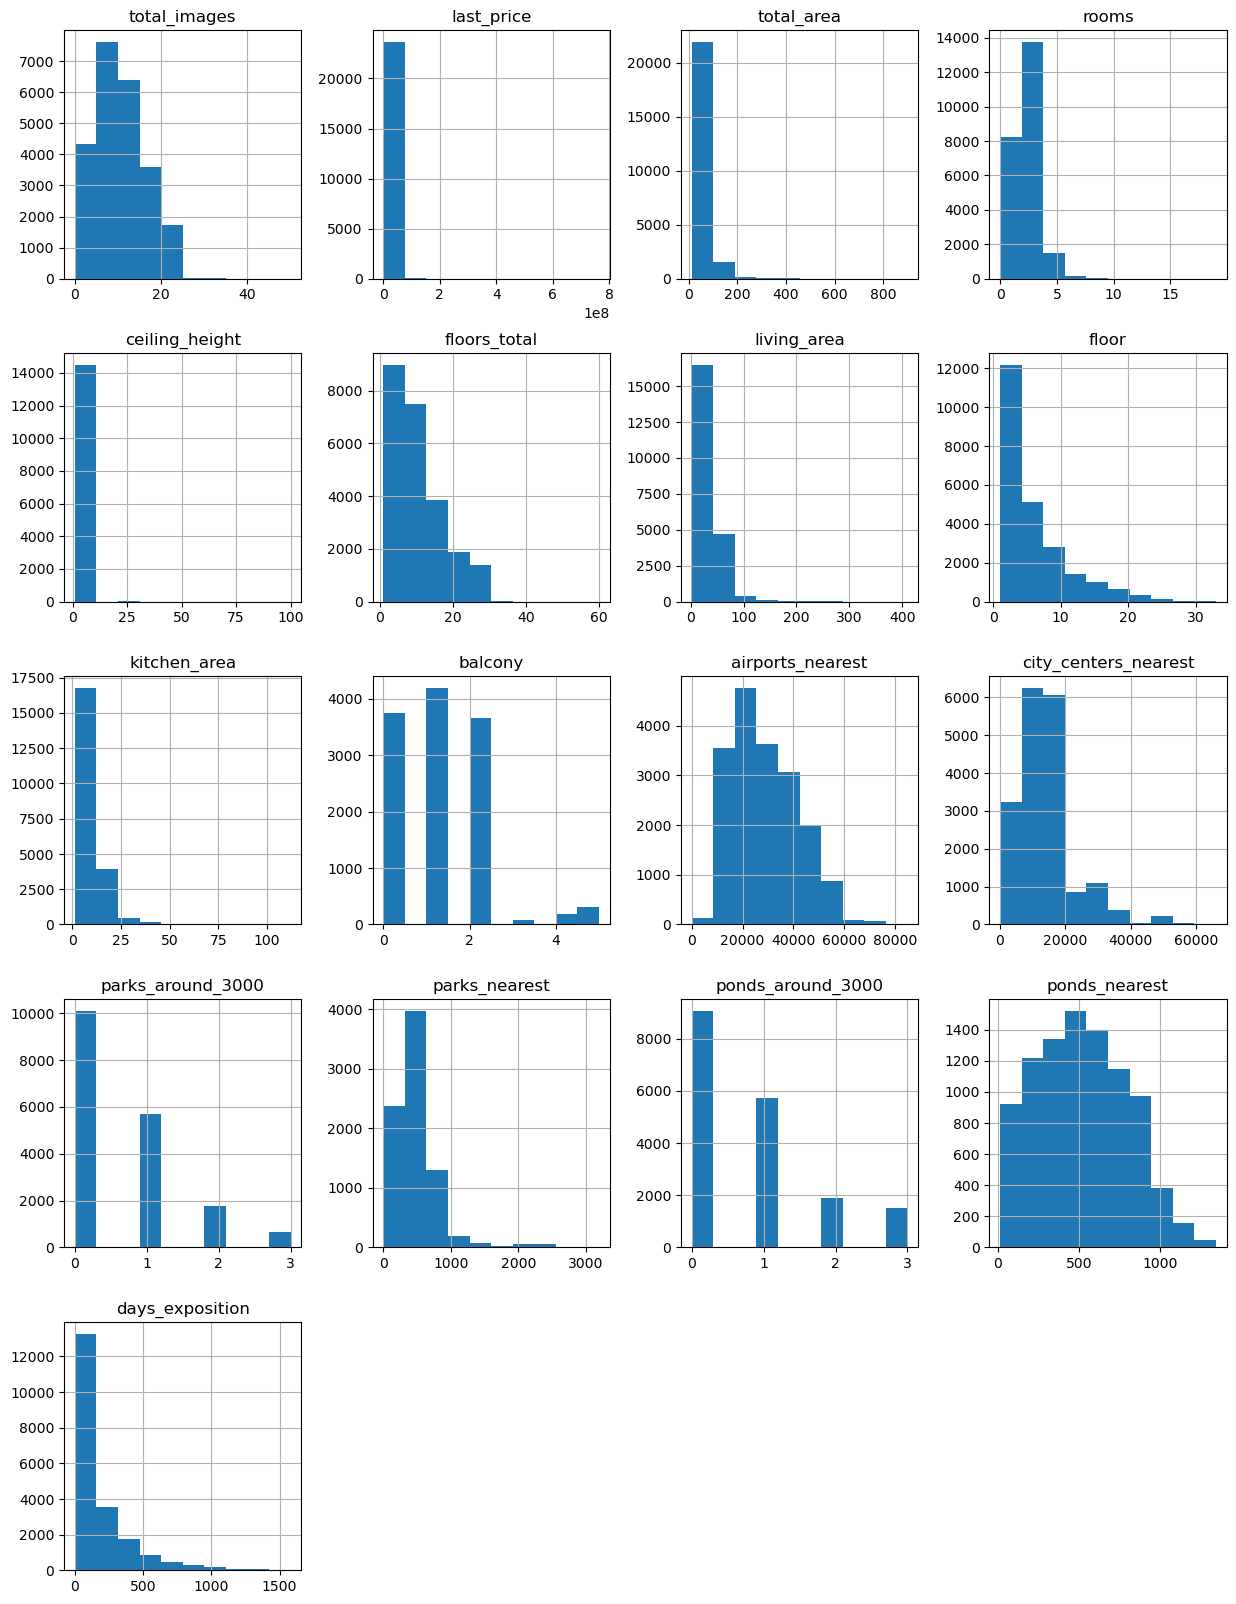

In [7]:
# первоначальные гисторгамы
data.hist(figsize=(15,20))

**Рассмотрим столбцы по отдельности: проработаем пропуски (если имеются), при необходимости изменим тип дпнных, проанализируеим нестандартные значения:** 

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Высота потолков:** 

In [10]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median() # высота потолков - количественная переменная. Судя по первоначальной гистограме 99% квартир имею потолки меньше 10м. Заполним пропуски срденим значение высоты потолков.

In [11]:
data.query('ceiling_height > 5') # выявим аномальные значения и попробуем исправить некоторые из них, учитывая норму в минимальную высоту 2.4м  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


In [12]:
#по возможности избавляемся от неявных дубликатов
data['ceiling_height'] = data['ceiling_height'].replace(
    {27 : 2.7, 
    32 : 3.2,
    25 : 2.5,
    24 : 2.4,
    26 : 2.6,
    27.5 : 2.75,
    22.6 : 2.26 
    }
)

In [13]:
#удаоляем строки, которые невозможно привести к логичным значениям
data['ceiling_height'] = data.loc[(data['ceiling_height'] != 100, 'ceiling_height') and
                                  (data['ceiling_height'] != 8, 'ceiling_height') and
                                  (data['ceiling_height'] != 14, 'ceiling_height') and
                                  (data['ceiling_height'] != 20, 'ceiling_height') and
                                  (data['ceiling_height'] != 10.3, 'ceiling_height')]

                                 
                                                                

In [14]:
data.query('ceiling_height > 7') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,...,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
17496,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,NaN,...,12.0,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


**Кл-во этажей:**

In [15]:
for local_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == local_name, 'floors_total'].median()
    data.loc[(data['floors_total'].isna())&(data['locality_name'] == local_name), 'floors_total'] = median
    

In [16]:
data['floors_total'].isna().sum()

1

In [17]:
data['floors_total'] = data['floors_total'].fillna(1)

In [18]:
data['floors_total'].isna().sum()

0

In [19]:
data['floors_total'] = data['floors_total'].astype('int64') #этажность выражается в целых числах, приведем к типу int

**Жилая площадь:**

In [20]:
data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median() # большинство квартир имеют площадь меньше 90м^2. позмом медиану этого занчения для заполнения пропусков  

**Аппартаменты:**

In [21]:
data['is_apartment'] = data['is_apartment'].fillna('')
data['is_apartment'] = data['is_apartment'].astype('bool') # навернаяка пропуски в столбце означают "не апартаменты", поэтому переводим строки в тип Bool(по инструкции) и заменим пропуски на False 

**Кухня:**

In [22]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()

**Кол-во балконов:**

In [23]:
data['balcony'] = data['balcony'].fillna(0) # примем пропуски в данных за отсутвствие балконов за 0

In [24]:
data['balcony'] = data['balcony'].astype('int64') #кол-во балконов выражается в целых числах, приведем к типу int

**Название нас. пункта:**

In [25]:
data['locality_name'] = data['locality_name'].fillna('') # заполним отсутствующие названия городов пустыми строками

In [26]:
data['locality_name'] = data['locality_name'].replace(
    {'ё' : 'е',
     'поселок городского типа' : 'поселок',
     'городской поселок' : 'поселок',
     'Мурино' : 'поселок Мурино'
    }
) # постараемся избавитсья от неявных дубликатов в названиях городов

**В таких категориях, как: airports_nearest, city_centers_nearest, parks_nearest,	ponds_nearest не указаны картографические данные растояния до объектов сразу для всей строки, либо вся строка заполнена. Это говорит о том, что данные со спутников липо подкрепляются целиком к объекту недвижимости, либо не подкрепляются вообще. Заменим пропуски для этих столбцов медианным значением	для каждого из столбца:**

In [27]:
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()
data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = data['city_centers_nearest'].median()
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].median()
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].median()

**Кол-во парков и прудов вокруг:**

In [28]:
#логично предположить, что пропуски значений в столбцах: parks_around_3000, ponds_around_3000 оначают отсутствие обозначенных объектов в указанном радиусе. Заменим их на 0 и приведем к типу int 
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].astype('int64')


In [29]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int64')

**Кол-во дней объявления:** 

 отсутствующие значения скорее всего свидетельствуют о том, что объявления были актуальны на момент составления спаска. 
Т.к. таких строк довольно много, не будем их менять, чтобы не нарушать объективности анализа 


**Дата публикации:**

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [31]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             1
floors_total               0
living_area                0
floor                      0
is_apartment               0
is_studio                  0
is_open_plan               0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3181
dtype: int64

In [32]:
data['last_price'] = data['last_price'].astype('int64')

In [33]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

17496     2.0
22869    10.0
Name: ceiling_height, dtype: float64

In [34]:
data['ceiling_height'] = data.loc[(data['ceiling_height'] != 100, 'ceiling_height')]

In [35]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

In [36]:
# проверка на явные дубликаты
data.duplicated().sum()

0

**Вывод по предобработке данных:
В исследуемых данных наибольший процент пропусков был в столбце апартаментов, это связано с изначально неверным типом данных а столбце и как следствие неврыми подсчетом значений в нем. Значительную долю пропусков составили картаграфические данные, которые либо полностью отсутствовали в строке либо, наоборот были полностью заполнены. Это может быть связано с привязкой геолокации к объекту. Пропуски в столбце с кол-вом балконов могли возникать из-за отсутствия самих баклконов в квартире. То же касается и кухни, если квартира - студия. Явных дубликатов выявлено не было**   

**ДОБАВЛЕНИЕ НОВЫХ СТОЛБЦОВ ДЛЯ ИССЛЕДОВАНИЯ:**

In [37]:
data['square_price'] = data['last_price'] / data['total_area'] # стоимтость квадратного метра

In [38]:
# месяц размещения
data['month_exposition'] = data['first_day_exposition'].dt.month #
data['month_exposition'] = data['month_exposition'].astype('str')
data['month_exposition'] = data['month_exposition'].replace(
    {'1' : 'январь',
     '2' : 'февраль',
     '3' : 'март',
     '4' : 'апрель',
     '5' : 'май',
     '6' : 'июнь',
     '7' : 'июль',
     '8' : 'август',
     '9' : 'сентябрь',
     '10' : 'октябрь',
     '11' : 'ноябрь',
     '12' : 'декабрь',
    }
)

In [39]:
# день недели размещееия
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['weekday_exposition'] = data['weekday_exposition'].astype('str')
data['weekday_exposition'] = data['weekday_exposition'].replace(
    {'0' : 'понедельник',
     '1' : 'вторник',
     '2' : 'среда',
     '3' : 'четверг',
     '4' : 'пятница',
     '5' : 'суббота',
     '6' : 'воскресенье',
    }
) 

In [40]:
# год размещения
data['year_exposition'] = data['first_day_exposition'].dt.year

In [41]:
# первый/последний этаж
data['floor_type'] = ['Другой']*len(data)
data.loc[data['floor'] == 1, 'floor_type'] = 'Первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'Последний'

In [42]:
# расстояние до центра(км)
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
data.loc[data['city_centers_nearest_km'].isna(), 'city_centers_nearest_km'] = data['city_centers_nearest_km'].median()


In [43]:
# цена одного квадроатного метра
data['price_by_meter'] = data['last_price'] / data['total_area']

In [44]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_price,month_exposition,weekday_exposition,year_exposition,floor_type,city_centers_nearest_km,price_by_meter
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,март,четверг,2019,Другой,16.0,120370.370370
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0,502.0,81.0,82920.792079,декабрь,вторник,2018,Первый,19.0,82920.792079
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.714286,август,четверг,2015,Другой,14.0,92785.714286
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.0,9,False,...,3,234.0,424.0,408176.100629,июль,пятница,2015,Другой,7.0,408176.100629
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,июнь,вторник,2018,Другой,8.0,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3,381.0,NaN,72490.845228,март,вторник,2017,Другой,4.0,72490.845228
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,0,502.0,45.0,52542.372881,январь,понедельник,2018,Другой,13.0,52542.372881
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0,502.0,NaN,44091.710758,февраль,воскресенье,2018,Первый,13.0,44091.710758
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.0,12,False,...,3,196.0,602.0,149511.400651,март,вторник,2017,Другой,10.0,149511.400651


**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ:**

<AxesSubplot:title={'center':'Общая полщадь'}, ylabel='Frequency'>

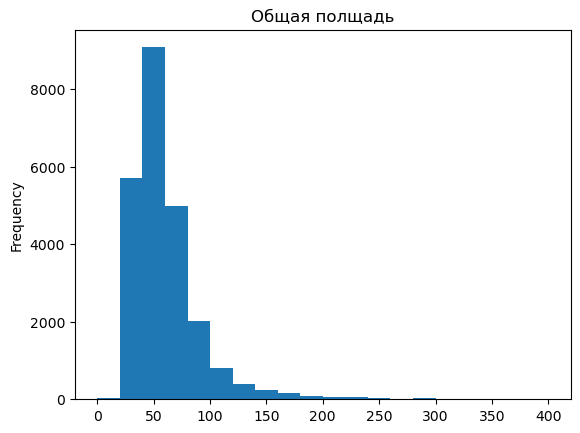

In [45]:
data['total_area'].plot(kind='hist', legend=False, range=(0, 400), bins=20, title='Общая полщадь')

In [46]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Основная доля проданных квартир приходится на общую прощадь от 25 до 100м^2

<AxesSubplot:title={'center':'Жилая полщадь'}, ylabel='Frequency'>

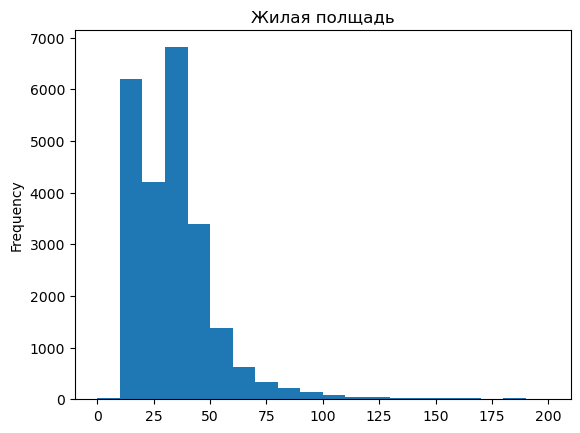

In [47]:
data['living_area'].plot(kind='hist', legend=False, range=(0, 200), bins=20, title='Жилая полщадь')

In [48]:
data['living_area'].describe()

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

Основновной диапазон жилой площади составляет от 15 до 60 м^2

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

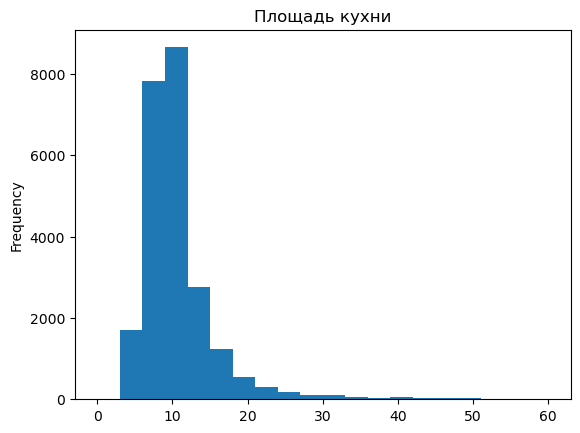

In [49]:

data['kitchen_area'].plot(kind='hist', legend=False, range=(0, 60), bins=20, title='Площадь кухни')

In [50]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

В основном, площадь кухни составляет около 10 м^2

<AxesSubplot:title={'center':'Цена недвижимости'}, ylabel='Frequency'>

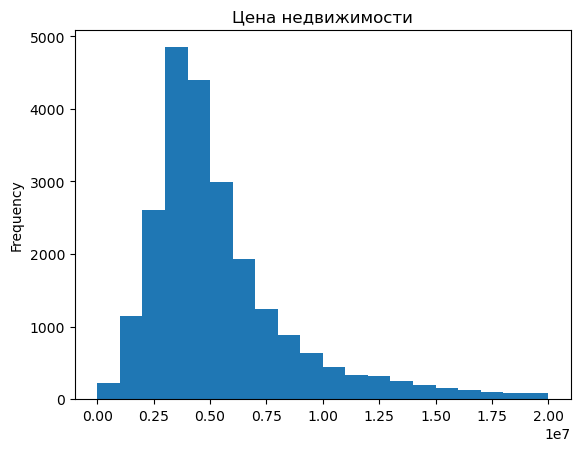

In [51]:
data['last_price'].plot(kind='hist', bins=20, range=(0, 20000000), title=('Цена недвижимости'))


In [52]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В основном, цена недвижимости колеблеца от 4 до 6 млн р.

<AxesSubplot:title={'center':'кол-во комнат'}, ylabel='Frequency'>

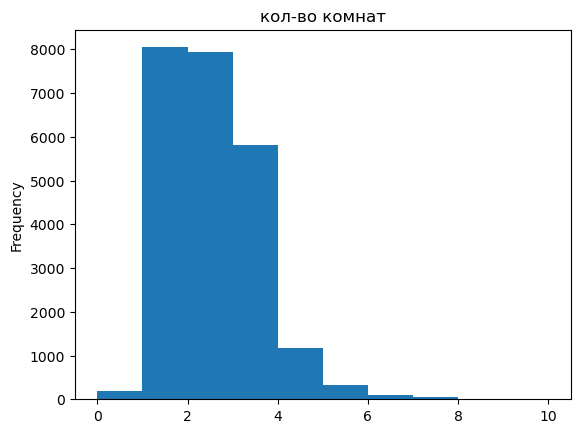

In [53]:
data['rooms'].plot(kind='hist', legend=False, range=(0, 10), title='кол-во комнат')

In [54]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

в основном, кол-вло составляет от 1 до 4

<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

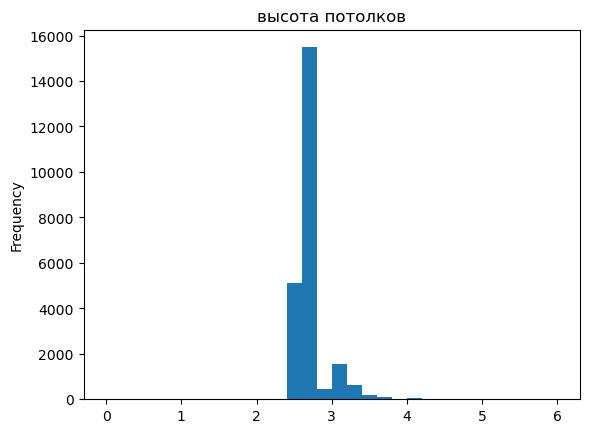

In [55]:
data['ceiling_height'].plot(kind='hist', bins=30, range=(0, 6), legend=False, title='высота потолков')

In [56]:
data['ceiling_height'].describe()

count    23697.000000
mean         2.698851
std          0.268409
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

Срелняя высота потолков составляет 2.7м, что соответствует стандартам РФ.

<AxesSubplot:title={'center':'Этаж'}, ylabel='Frequency'>

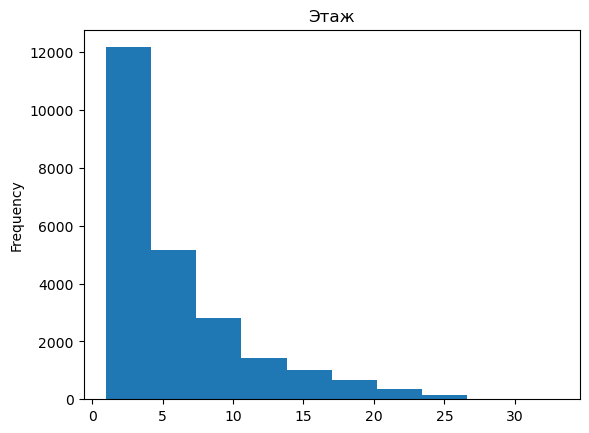

In [57]:
data['floor'].plot(kind='hist', legend=False, title='Этаж')

In [58]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Данный график свидетельствует о том, в основная продажа квартир приходится на этажи ниже 5го

Text(0.5, 1.0, 'Тип этажа')

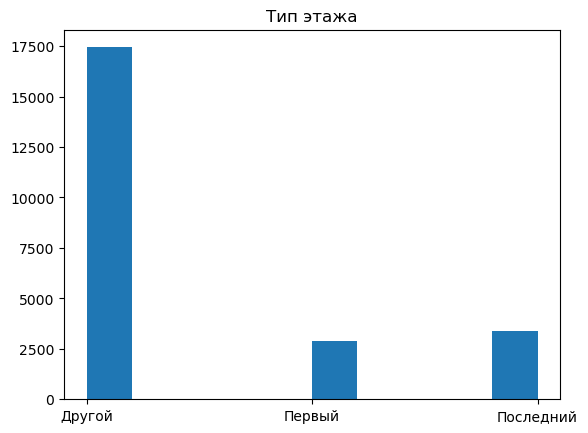

In [59]:
plt.hist(data['floor_type'])
plt.title('Тип этажа')

График был предсказуем, на первом и послднем этажах квариры продаюся примерно в равной пропорции, на промежуточных этажах продажа чаще, т.к. их в принципе в разы больше

<AxesSubplot:title={'center':'Этажность домов'}, ylabel='Frequency'>

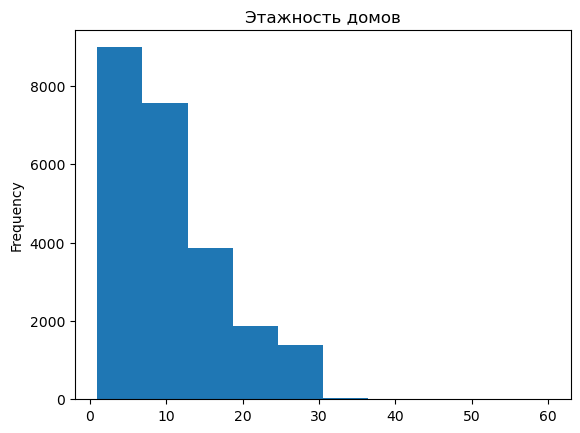

In [60]:
data['floors_total'].plot(kind='hist', title='Этажность домов')

Преобоадают дома до 10ти этажей 

<AxesSubplot:title={'center':'Расстояние до аэропорта'}, ylabel='Frequency'>

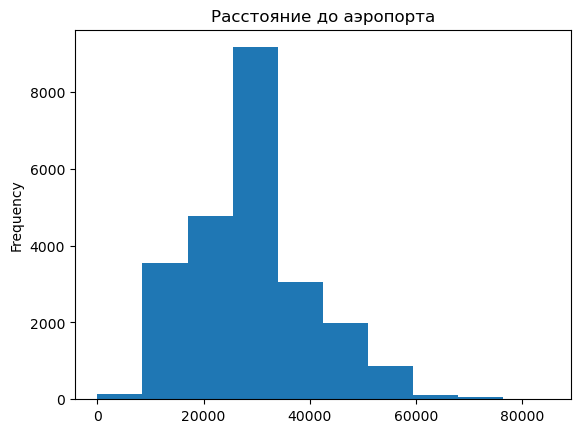

In [61]:
data['airports_nearest'].plot(kind='hist', title='Расстояние до аэропорта')

In [62]:
data['airports_nearest'].describe()

count    23699.000000
mean     28310.148023
std      11090.330161
min          0.000000
25%      21183.000000
50%      26726.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Среднее расстояние до аэропорта 28км

<AxesSubplot:title={'center':'Расстояние до центра города'}, ylabel='Frequency'>

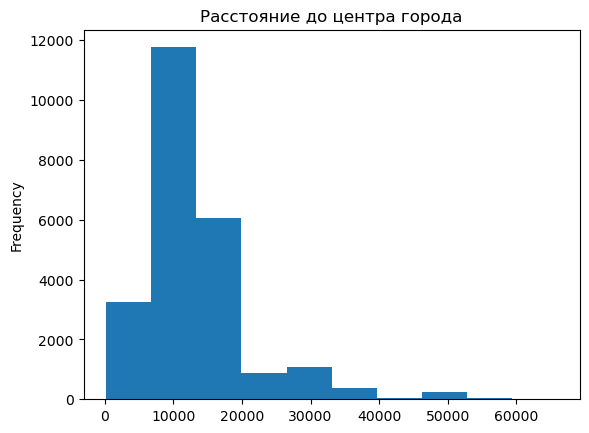

In [63]:
data['city_centers_nearest'].plot(kind='hist', title='Расстояние до центра города')

In [64]:
data['city_centers_nearest'].describe()

count    23699.000000
mean     13936.792797
std       7553.779633
min        181.000000
25%      10927.000000
50%      13098.500000
75%      15248.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Среднее расстояние до центра города 14км

<AxesSubplot:title={'center':'Расстояние до ближайшего парка'}, ylabel='Frequency'>

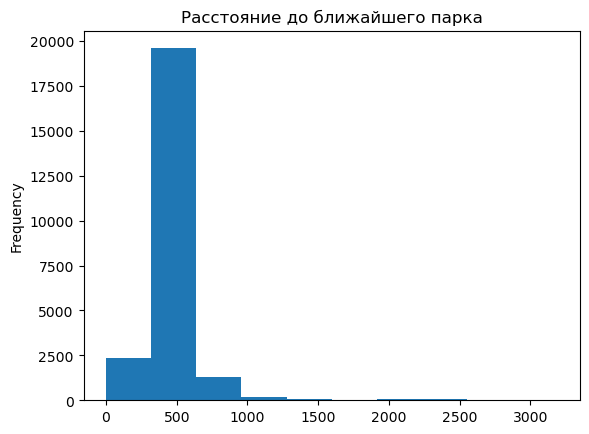

In [65]:
data['parks_nearest'].plot(kind='hist', title='Расстояние до ближайшего парка')

In [66]:
data['parks_nearest'].describe()

count    23699.000000
mean       467.205789
std        200.579309
min          1.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64

Среднее расстояние до ближайшего парка 500м

Text(0.5, 1.0, 'Размещение объявлений по годам')

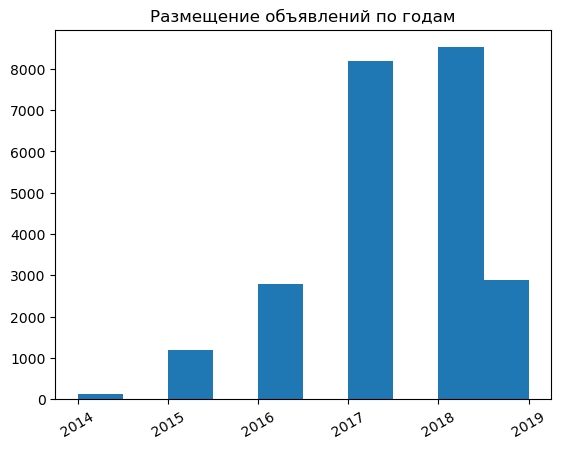

In [67]:
plt.hist(data['year_exposition'])
plt.xticks(rotation=30)
plt.title('Размещение объявлений по годам')

In [68]:
display(data['first_day_exposition'].min(), data['first_day_exposition'].max()) # диапазон наблюдений по времени


Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

Сервис размещения недвижимости набирает обороты, данные за 2019год были предоствлены только до начала мая, от сюда просадка в последнем столбце.

Text(0.5, 1.0, 'Размещение объявлений по месяцам')

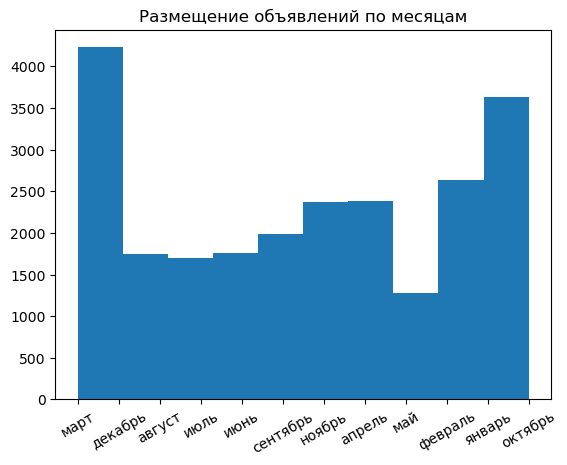

In [69]:
plt.hist(data['month_exposition'])
plt.xticks(rotation=30)
plt.title('Размещение объявлений по месяцам')

Самый активные месяцы размещения объявлений - март и октябрь. По какой-то причине в мае налюбается спад.

Text(0.5, 1.0, 'Размещение объявлений по месяцам')

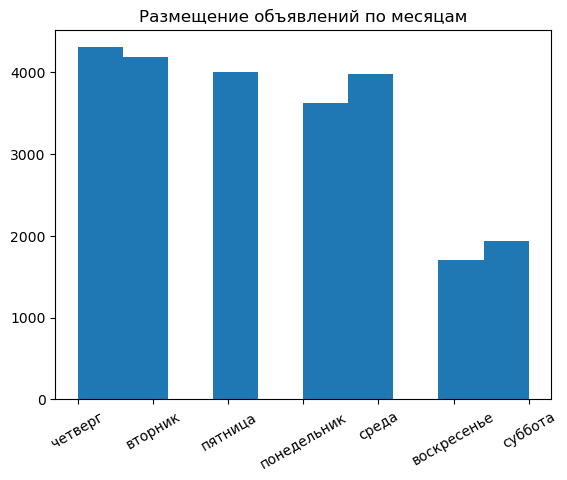

In [70]:
plt.hist(data['weekday_exposition'])
plt.xticks(rotation=30)
plt.title('Размещение объявлений по месяцам')

Наиболее активно объявления размещаюся в будние дни

**АНАЛИЗ ВРЕМЕНИ ПРОАДЖИ ЖИЛЬЯ:**

<AxesSubplot:title={'center':'Период размещения объявлений по частоте значений'}, ylabel='Frequency'>

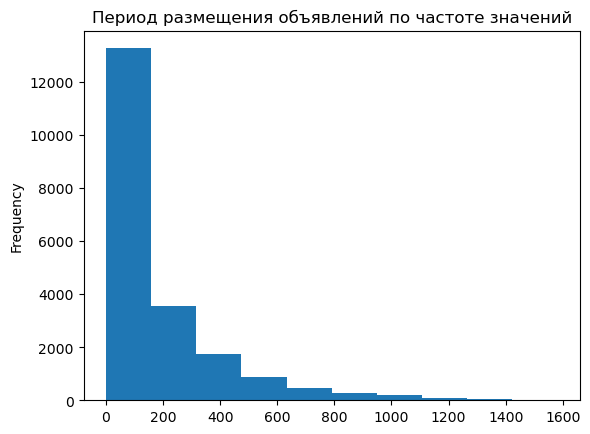

In [71]:
data['days_exposition'].plot(kind='hist', title=('Период размещения объявлений по частоте значений'))

In [72]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем объявления размещены в течение 180дней. Посмотрим, как это зависит от года размещения

In [73]:
days_stats = data.pivot_table(index ='year_exposition', values ='days_exposition', aggfunc=('median', 'mean'))
days_stats.columns = ['days_mean', 'days_median']
days_stats

,days_mean,days_median
year_exposition,,
2014,910.983193,875.0
2015,648.035682,576.0
2016,320.748159,235.0
2017,158.955929,103.0
2018,94.337963,64.0
2019,30.931671,23.0


<AxesSubplot:xlabel='year_exposition'>

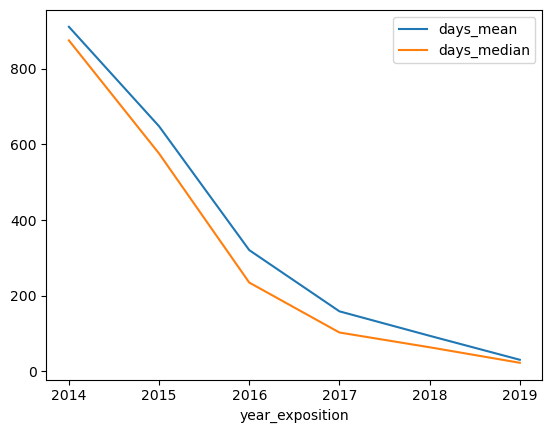

In [74]:
days_stats.plot(title=(''))


Мы наблюдаем большой разброс в данных, это может быть связано с тем, что с 2014 года накопился некоторый объем старых объявлений. Тем более, что в нашем датасете треть квартир по-прежнему не проданы, что искажает данные.

(0.0, 800.0)

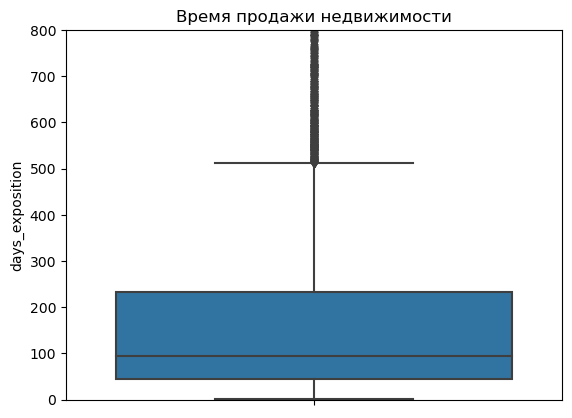

In [75]:
sns.boxplot(y='days_exposition', data=data)
plt.title('Время продажи недвижимости')
plt.ylim(0, 800)

Быстрыми считаются продажи до 50 дней, медленными - больше 250 дней

Проанализируем зависимость стоимости недвижимости от oобщей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира, даты размещения. Перед этим избавимся от выбросов в данных.

(0.0, 20000000.0)

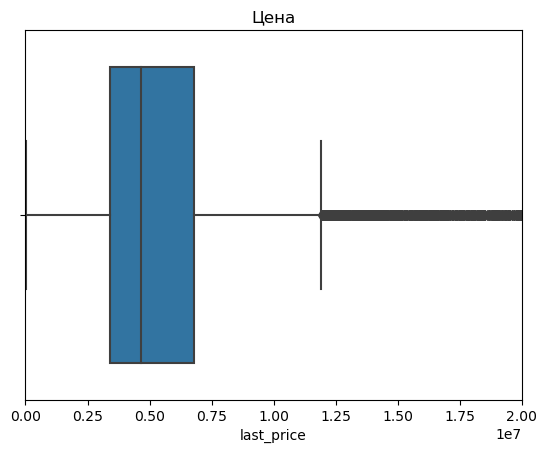

In [76]:
sns.boxplot(x='last_price', data=data)
plt.title('Цена')
plt.xlim(0, 20000000)

(0.0, 200.0)

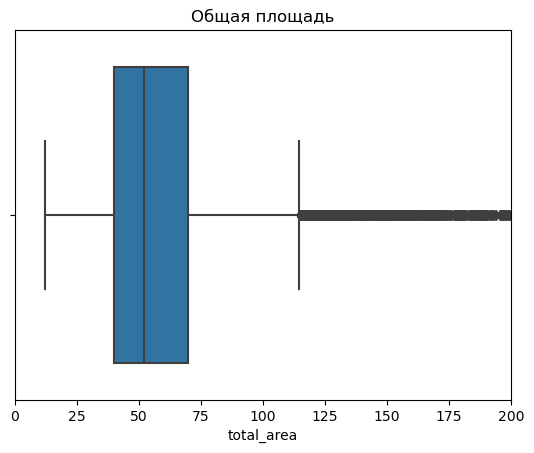

In [77]:
sns.boxplot(x='total_area', data=data)
plt.title('Общая площадь')
plt.xlim(0, 200)

(0.0, 200.0)

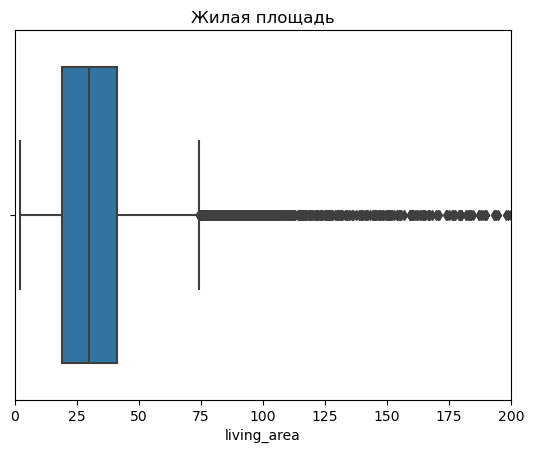

In [78]:
sns.boxplot(x='living_area', data=data)
plt.title('Жилая площадь')
plt.xlim(0, 200)

(0.0, 75.0)

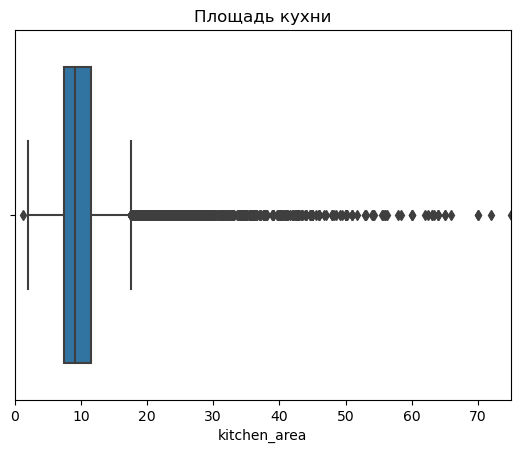

In [79]:
sns.boxplot(x='kitchen_area', data=data)
plt.title('Площадь кухни')
plt.xlim(0, 75)

In [80]:
data_filtred = data.query('total_area < 120 & living_area < 75 & kitchen_area < 18 & last_price < 13000000')
data_filtred

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_price,month_exposition,weekday_exposition,year_exposition,floor_type,city_centers_nearest_km,price_by_meter
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,502.0,81.0,82920.792079,декабрь,вторник,2018,Первый,19.0,82920.792079
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574.0,558.0,92785.714286,август,четверг,2015,Другой,14.0,92785.714286
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,502.0,55.0,95065.789474,сентябрь,понедельник,2018,Другой,13.0,95065.789474
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,502.0,155.0,99195.710456,ноябрь,четверг,2017,Другой,19.0,99195.710456
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,502.0,189.0,87454.764777,май,среда,2018,Другой,13.0,87454.764777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,False,...,0,502.0,413.0,45000.000000,июль,пятница,2017,Другой,13.0,45000.000000
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,1,675.0,239.0,73717.948718,август,пятница,2016,Другой,34.0,73717.948718
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,0,502.0,45.0,52542.372881,январь,понедельник,2018,Другой,13.0,52542.372881
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,0,502.0,NaN,44091.710758,февраль,воскресенье,2018,Первый,13.0,44091.710758


<AxesSubplot:title={'center':'Зависомсть цены от общей площади'}, xlabel='total_area', ylabel='last_price'>

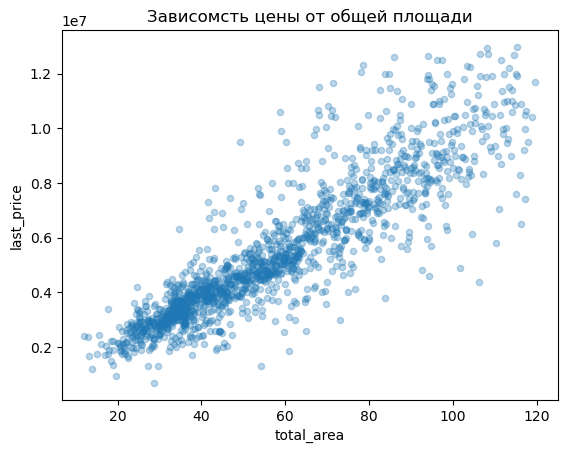

In [81]:
data_total_area = data_filtred.pivot_table(
    index='total_area', values='last_price', aggfunc='mean'
)
data_total_area['total_area'] = data_total_area.index
data_total_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, title=('Зависомсть цены от общей площади'))

In [82]:
data_filtred['total_area'].corr(data_filtred['last_price']) # расчет корреляции

0.7018591469476685

Мы можем наюдать прямую зависимоть увеличения цены недвижимости от общей площади

<AxesSubplot:title={'center':'Зависомсть цены от жилой площади'}, xlabel='living_area', ylabel='last_price'>

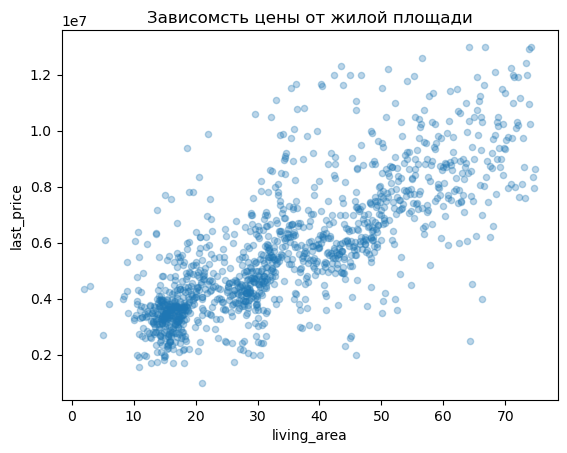

In [83]:
data_total_area = data_filtred.pivot_table(
    index='living_area', values='last_price', aggfunc='mean'
)
data_total_area['living_area'] = data_total_area.index
data_total_area.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, title=('Зависомсть цены от жилой площади'))

От жилой площади зависимость ниже, но тенденция сохраняется

<AxesSubplot:title={'center':'Зависомсть цены от площади кухни'}, xlabel='kitchen_area', ylabel='last_price'>

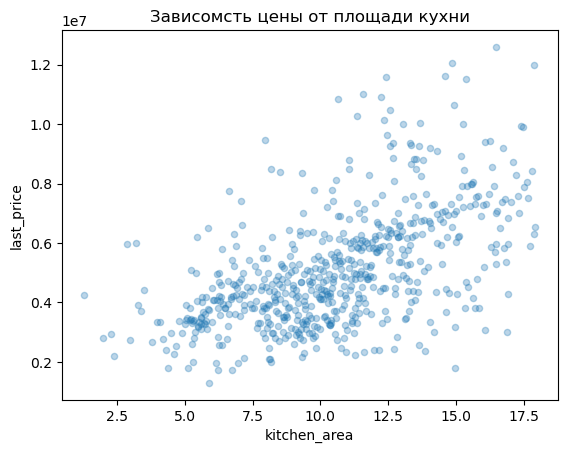

In [84]:
data_total_area = data_filtred.pivot_table(
    index='kitchen_area', values='last_price', aggfunc='mean'
)
data_total_area['kitchen_area'] = data_total_area.index
data_total_area.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, title=('Зависомсть цены от площади кухни'))

In [85]:
data_filtred['kitchen_area'].corr(data_filtred['last_price'])

0.46149334838521544

От площади кухни зависимоть не высокая

<AxesSubplot:title={'center':'Зависомсть цены от количества комнат'}, xlabel='rooms'>

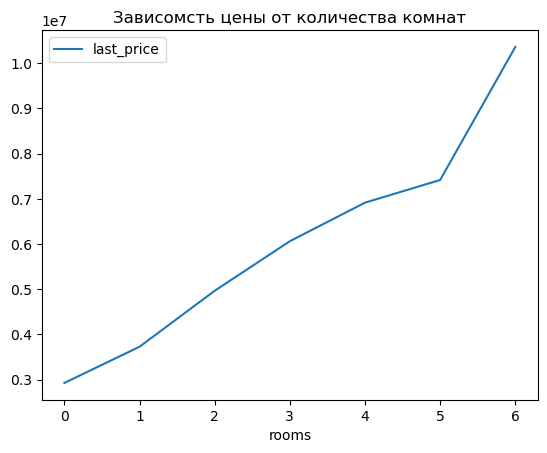

In [86]:
data_filtred.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(title=('Зависомсть цены от количества комнат'))

От кол-ва комнат тоже прямая зависимость

[Text(0.5, 1.0, 'Зависимость цены от этажа')]

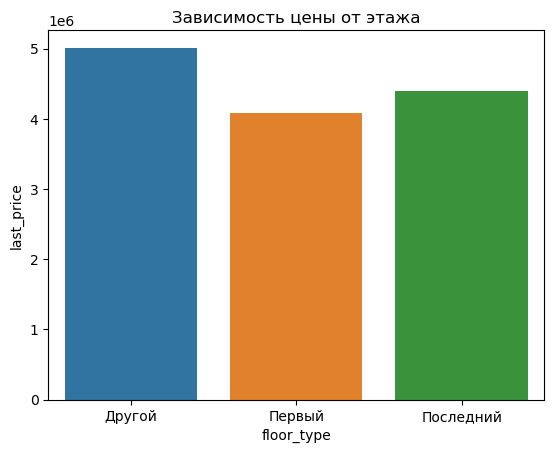

In [87]:
data_floor = data_filtred.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
data_floor['floor_type'] = data_floor.index
sns.barplot(x='floor_type', y='last_price', data=data_floor).set(title='Зависимость цены от этажа')

Мы видим, что цена на первый и последний этажи ниже, чем на остальные. Это может быть связано с бытовыми неудобствами

<AxesSubplot:title={'center':'Завимость цены от года'}, xlabel='year_exposition'>

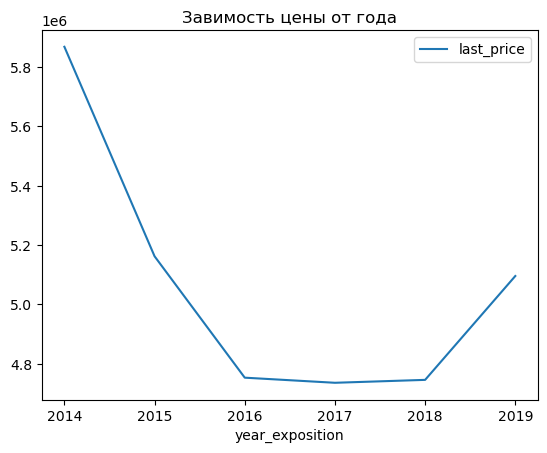

In [88]:
data_filtred.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(title='Завимость цены от года')

Кореляции с датой выставления объявления нет, т.к. цена могла увеличиваться в соответствии с рынком.

<AxesSubplot:title={'center':'Завимость цены от месяца'}, xlabel='month_exposition'>

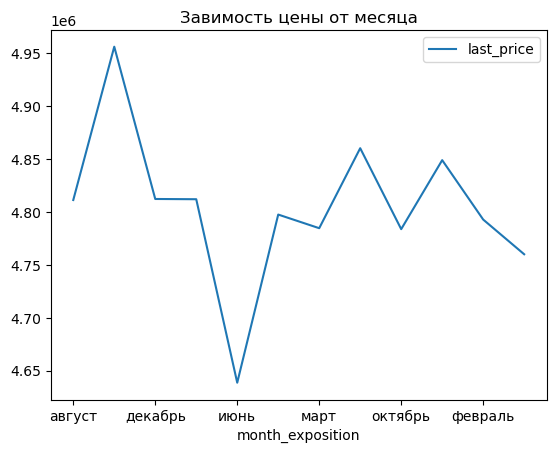

In [89]:
data_filtred.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot(title='Завимость цены от месяца')

Мы можем наблюдать сезонное увеличение и снижение цены на недвижимость. Наиболее низкая цена - в июне.  

<AxesSubplot:title={'center':'Завимость цены от дня недели'}, xlabel='weekday_exposition'>

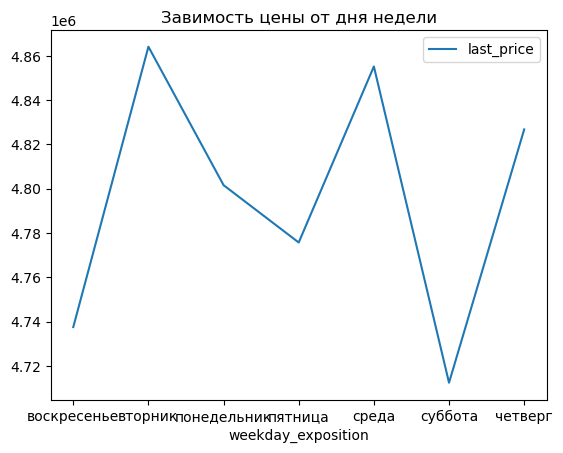

In [90]:
data_filtred.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').plot(title='Завимость цены от дня недели')

Можем наблюдать наиболле низкую цену на недвижимость, выставленную в субботу. Однако, с чем связана такая тенденция сказать сложно

**Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

In [91]:
# для начала отфильтруем топ 10 населенных пунктов с наибольшим числом объявлений 
data_filtred_top = data_filtred.loc[data_filtred['locality_name'].isin(data_filtred['locality_name'].value_counts().index[:10])]

In [92]:
data_filtred_top10 = data_filtred_top.pivot_table(index='locality_name', values='price_by_meter', aggfunc='mean')

In [93]:
data_filtred_top10['locality_name'] = data_filtred_top10.index
data_filtred_top10.sort_values(by='price_by_meter', ascending=False)

,price_by_meter,locality_name
locality_name,,
Санкт-Петербург,105983.687096,Санкт-Петербург
Пушкин,100137.136391,Пушкин
деревня Кудрово,92921.409873,деревня Кудрово
посёлок Парголово,90687.240036,посёлок Парголово
посёлок Мурино,85906.575586,посёлок Мурино
посёлок Шушары,78652.201681,посёлок Шушары
Колпино,75320.527350,Колпино
Гатчина,68545.043747,Гатчина
Всеволожск,67008.733335,Всеволожск


In [94]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15721,5500000.0
посёлок Мурино,522,3400000.0
посёлок Шушары,440,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
посёлок Парголово,327,4100000.0
Гатчина,307,3100000.0
деревня Кудрово,299,3790000.0


<AxesSubplot:xlabel='price_by_meter', ylabel='locality_name'>

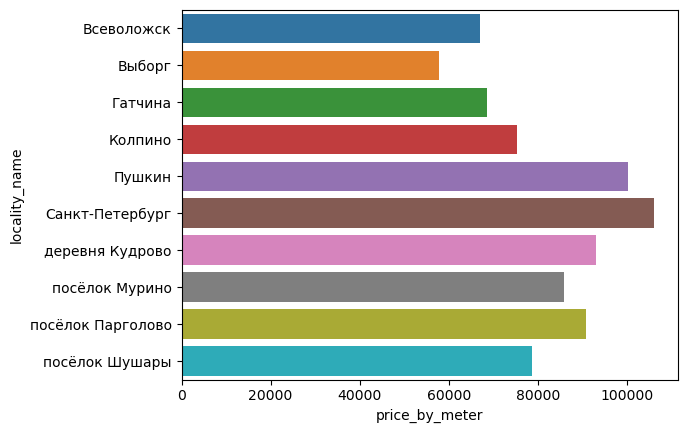

In [95]:
sns.barplot(x='price_by_meter', y='locality_name', data=data_filtred_top10)

Самым дорогим городом предсказуемо оказался Санкт-Петербург, на последнем месте расположился Выборг

**Анализ стоимости квартир в Санкт-Петербурге в зависимости от удаленности от центра:**

In [96]:
data_spb = data_filtred.loc[
    data_filtred['locality_name'] == 'Санкт-Петербург'
].pivot_table(index='city_centers_nearest_km', 
              values='last_price', 
              aggfunc='mean')

In [97]:
data_spb['city_centers_nearest_km'] = data_spb.index


In [98]:
data_spb.reset_index(drop=True)

,last_price,city_centers_nearest_km
0,8.053333e+06,0.0
1,8.536449e+06,1.0
2,7.805796e+06,2.0
3,7.085873e+06,3.0
4,7.613011e+06,4.0
5,7.721688e+06,5.0
6,7.275150e+06,6.0
7,6.624741e+06,7.0
8,6.693378e+06,8.0
9,5.598008e+06,9.0


<AxesSubplot:title={'center':'Зависимость цены от расстояния'}, xlabel='city_centers_nearest_km'>

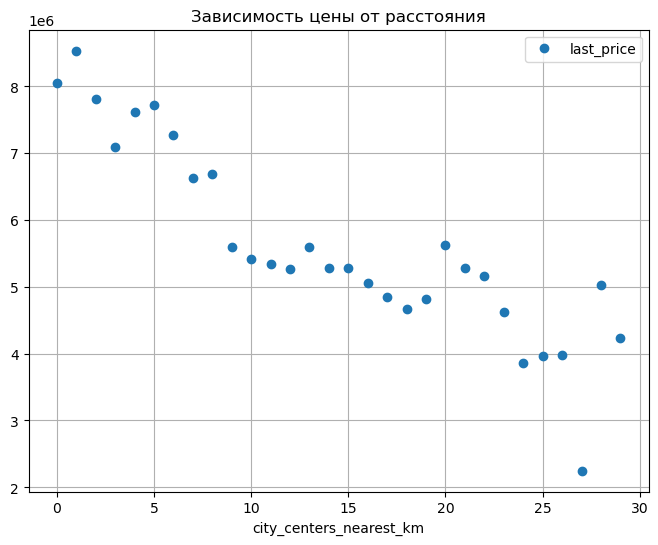

In [99]:
data_spb.plot(x='city_centers_nearest_km', y='last_price',style='o', figsize=(8, 6), grid=True, title='Зависимость цены от расстояния')  

In [100]:
data_spb['last_price'].corr(data_spb['city_centers_nearest_km'])

-0.8973139053585487

Мы наблюдаем коэффициент корреляции 0.9, что свидетельствует о прямой завимости меджу стоимостью жилья в Санкт-Петербурге и удваленностью от центра города. Так же в этом можно убдеиться на графике  

**Вывод:**
  По предоставленным данным была проведена следующая работа: 
  
  -Выяввлены и и по возможности устранены пропуски и аномалии в столбцах: кол-во балконов, апартаменты, жилая и нежилая площадь, площадь кухни.
  
  -Скорректированы картографические данные, такие как: удаленномть от центра и аэропортов, ближайшие инфраструктурные объеты.
  Проведен анализ данных, на основе цены на недвижимость и времени продажи.
  В результате сформировались следующие завмисимости: 
  
  - В основном недвижиость представлена площадью от 25 до 100 квадратных метров.
  - Средняя цена составляет 6,5 млн. рублей.
  - Стандартный период размещения объявления составляет от нескольких недель до нескольких месяцев вплоть до 250 дней. 
  - Мы можем наблюдать прямую зависимость роста цена от жилплощади, однако зависимость цены от площади кухни прослеживается неявно. 
  - Помимо этого, на снижение цены может повлиять этаж расположения квартиры (первый или последний).
  - В Санкт-Петербурге на уровень цены напрямую влияет удаленность от центра, более того, цена меняется с каждым километром.
  - Не прослеживалось зависимости от даты размещения оъявления, т.к. цена может неоднократно корректироваться в соответствии с поведением рынка. 